In [1]:
import logging

import numpy as np
import matplotlib.pyplot as plt

# Make analysis reproducible
np.random.seed(0)

# Enable logging
logging.basicConfig(level=logging.INFO)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
import jax
import pprint

pprint.pprint(jax.devices())

INFO:jax._src.xla_bridge:Unable to initialize backend 'cuda': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
INFO:jax._src.xla_bridge:Unable to initialize backend 'rocm': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
INFO:jax._src.xla_bridge:Unable to initialize backend 'tpu': module 'jaxlib.xla_extension' has no attribute 'get_tpu_client'
INFO:jax._src.xla_bridge:Unable to initialize backend 'plugin': xla_extension has no attributes named get_plugin_device_client. Compile TensorFlow with //tensorflow/compiler/xla/python:enable_plugin_device set to true (defaults to false) to enable this.


[CpuDevice(id=0)]


In [3]:
device_id = 0
device = jax.devices()[device_id]
device

CpuDevice(id=0)

In [4]:
jax.config.update("jax_default_device", device)

In [5]:
from replay_trajectory_classification.sorted_spikes_simulation import (
    make_simulated_run_data,
)

MM_TO_INCHES = 1.0 / 25.4
TWO_COLUMN = 178.0 * MM_TO_INCHES
GOLDEN_RATIO = (np.sqrt(5) - 1.0) / 2.0

(
    time,
    linear_distance,
    sampling_frequency,
    spikes,
    place_fields,
) = make_simulated_run_data()

INFO:numexpr.utils:Note: NumExpr detected 10 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
/Users/edeno/miniconda3/envs/non_local_detector/lib/python3.11/site-packages/replay_trajectory_classification/likelihoods/multiunit_likelihood.py:8: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [6]:
from replay_trajectory_classification import (
    SortedSpikesClassifier,
    Environment,
    RandomWalk,
    Uniform,
    estimate_movement_var,
)


movement_var = estimate_movement_var(linear_distance, sampling_frequency)

environment = Environment(place_bin_size=np.sqrt(movement_var))
continuous_transition_types = [
    [RandomWalk(movement_var=movement_var * 120), Uniform()],
    [Uniform(), Uniform()],
]

classifier = SortedSpikesClassifier(
    environments=environment,
    continuous_transition_types=continuous_transition_types,
    sorted_spikes_algorithm="spiking_likelihood_glm",
    sorted_spikes_algorithm_params={"knot_spacing": 10},
)
classifier.fit(linear_distance, spikes)

INFO:replay_trajectory_classification.classifier:Fitting initial conditions...
INFO:replay_trajectory_classification.classifier:Fitting continuous state transition...
INFO:replay_trajectory_classification.classifier:Fitting discrete state transition
INFO:replay_trajectory_classification.classifier:Fitting place fields...
INFO:distributed.http.proxy:To route to workers diagnostics web server please install jupyter-server-proxy: python -m pip install jupyter-server-proxy
/Users/edeno/miniconda3/envs/non_local_detector/lib/python3.11/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 61979 instead
  warnings.warn(
INFO:distributed.scheduler:State start
INFO:distributed.diskutils:Found stale lock file and directory '/var/folders/86/m147b4k17lddvs_xsw0mj2zw0000gn/T/dask-scratch-space/worker-6iw013o1', purging
INFO:distributed.diskutils:Found stale lock file and directory '/var/folders/8

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:61994', name: 0, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:61994
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:61998
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:61999', name: 2, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:61999
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:62001
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:61993', name: 1, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:61993
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:61997
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:62004', name: 4, status: init, memory: 0, processing: 0>


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


SortedSpikesClassifier(continuous_transition_types=[[RandomWalk(environment_name='',
                                                                movement_var=33.31009971953084,
                                                                movement_mean=0.0,
                                                                use_diffusion=False),
                                                     Uniform(environment_name='',
                                                             environment2_name=None)],
                                                    [Uniform(environment_name='',
                                                             environment2_name=None),
                                                     Uniform(environment_name='',
                                                             environment2_name=None)]],
                       discrete_transition_type=DiagonalDis...
                                                 fill_holes=False,
                                                 dilate=False,
                                                 bin_count_threshold=0),),
                       infer_track_interior=True,
                       initial_conditions_type=UniformInitialConditions(),
                       observation_models=(ObservationModel(environment_name='',
                                                            encoding_group=0),
                                           ObservationModel(environment_name='',
                                                            encoding_group=0)),
                       sorted_spikes_algorithm='spiking_likelihood_glm',
                       sorted_spikes_algorithm_params={'knot_spacing': 10})

In [7]:
from replay_trajectory_classification.sorted_spikes_simulation import (
    make_fragmented_continuous_fragmented_replay,
)

replay_time, test_spikes = make_fragmented_continuous_fragmented_replay()

state_names = ["Continuous", "Fragmented"]
results = classifier.predict(test_spikes, time=replay_time, state_names=state_names)

INFO:replay_trajectory_classification.classifier:Estimating likelihood...
INFO:replay_trajectory_classification.classifier:Estimating causal posterior...
INFO:replay_trajectory_classification.classifier:Estimating acausal posterior...
/Users/edeno/miniconda3/envs/non_local_detector/lib/python3.11/site-packages/replay_trajectory_classification/core.py:205: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (Array(float64, 2, 'F', False, aligned=True), Array(float64, 2, 'A', False, aligned=True))
  discrete_state_transition[state_k, state_k_1]


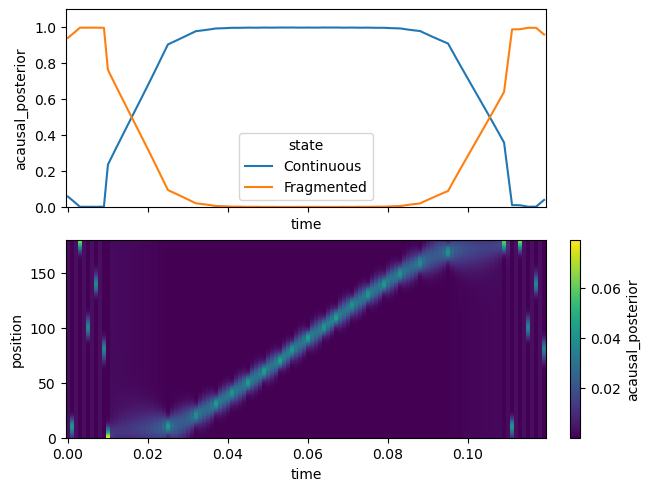

In [8]:
fig, axes = plt.subplots(2, 1, sharex=True, constrained_layout=True)
results.acausal_posterior.sum("position").plot(x="time", hue="state", ax=axes[0])
axes[0].set_ylim((0, 1.1))
results.acausal_posterior.sum("state").plot(x="time", y="position", ax=axes[1])

In [9]:
from non_local_detector import ContFragSortedSpikesClassifier

classifier2 = ContFragSortedSpikesClassifier(
    environments=environment,
    continuous_transition_types=continuous_transition_types,
    sorted_spikes_algorithm="sorted_spikes_glm",
    sorted_spikes_algorithm_params={"emission_knot_spacing": 10, "l2_penalty": 1e-7},
).fit(linear_distance, spikes)
results2 = classifier2.predict(test_spikes, time=replay_time)

INFO:non_local_detector.models.base:Fitting initial conditions...
INFO:non_local_detector.models.base:Fitting discrete state transition
INFO:non_local_detector.models.base:Fitting continuous state transition...
INFO:non_local_detector.models.base:Fitting place fields...


Encoding models:   0%|          | 0/19 [00:00<?, ?cell/s]

INFO:distributed.utils_perf:full garbage collection released 470.12 MiB from 83942 reference cycles (threshold: 9.54 MiB)
INFO:non_local_detector.models.base:Computing log likelihood...


Non-Local Likelihood:   0%|          | 0/19 [00:00<?, ?cell/s]

INFO:non_local_detector.models.base:Computing posterior...
INFO:non_local_detector.models.base:Finished computing posterior...


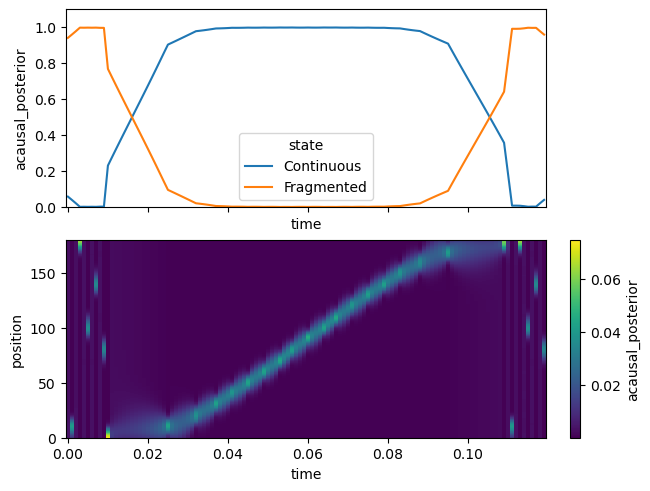

In [10]:
fig, axes = plt.subplots(2, 1, sharex=True, constrained_layout=True)
results2.acausal_posterior.unstack("state_bins").sum("position").plot(
    x="time", hue="state", ax=axes[0]
)
axes[0].set_ylim((0, 1.1))
results2.acausal_posterior.unstack("state_bins").sum("state").plot(
    x="time", y="position", ax=axes[1]
)

In [11]:
np.allclose(classifier.initial_conditions_.ravel(), classifier2.initial_conditions_)

True

In [12]:
for from_state in range(2):
    for to_state in range(2):
        print(
            np.allclose(
                classifier.continuous_state_transition_[from_state, to_state],
                classifier2.continuous_state_transitions_[
                    np.ix_(
                        classifier2.state_ind_ == from_state,
                        classifier2.state_ind_ == to_state,
                    )
                ],
            )
        )

True
True
True
True


In [13]:
np.allclose(
    classifier.discrete_state_transition_, classifier2.discrete_state_transitions_
)

True

In [14]:
norm_likelihood = np.exp(
    classifier2.log_likelihood_ - classifier2.log_likelihood_.max(axis=1, keepdims=True)
)
norm_likelihood

array([[9.9947160e-01, 9.9942970e-01, 9.9934614e-01, ..., 9.9980241e-01,
        9.9991053e-01, 9.9998367e-01],
       [2.7905506e-01, 3.0852029e-01, 3.4082082e-01, ..., 1.6379762e-04,
        1.7042007e-04, 1.7740193e-04],
       [9.9947160e-01, 9.9942970e-01, 9.9934614e-01, ..., 9.9980241e-01,
        9.9991053e-01, 9.9998367e-01],
       ...,
       [4.1515898e-04, 4.0735706e-04, 3.9978829e-04, ..., 3.4695971e-04,
        3.8299820e-04, 4.2341993e-04],
       [9.9947160e-01, 9.9942970e-01, 9.9934614e-01, ..., 9.9980241e-01,
        9.9991053e-01, 9.9998367e-01],
       [4.1789628e-04, 4.1064716e-04, 4.0360767e-04, ..., 4.0523140e-04,
        4.1180212e-04, 4.1855758e-04]], dtype=float32)

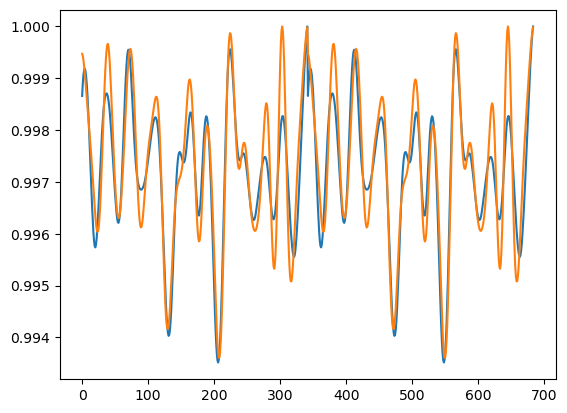

In [15]:
time_ind = 0

plt.plot(
    np.concatenate(
        (
            results.likelihood.sel(state="Continuous").isel(time=time_ind).values,
            results.likelihood.sel(state="Fragmented").isel(time=time_ind).values,
        )
    )
)
plt.plot(norm_likelihood[time_ind])

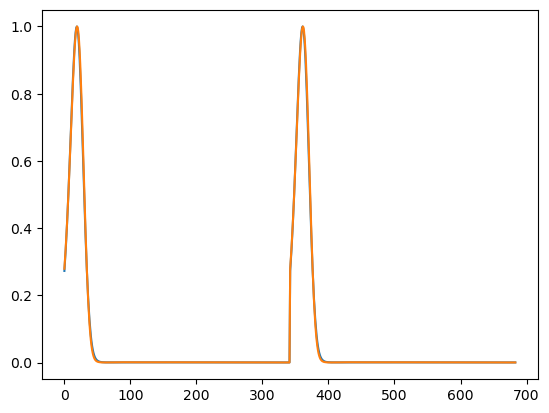

In [16]:
time_ind = 1

plt.plot(
    np.concatenate(
        (
            results.likelihood.sel(state="Continuous").isel(time=time_ind).values,
            results.likelihood.sel(state="Fragmented").isel(time=time_ind).values,
        )
    )
)
plt.plot(norm_likelihood[time_ind])

In [17]:
from non_local_detector import ContFragSortedSpikesClassifier

classifier3 = ContFragSortedSpikesClassifier(
    environments=environment,
    continuous_transition_types=continuous_transition_types,
    sorted_spikes_algorithm="sorted_spikes_kde",
    sorted_spikes_algorithm_params={"position_std": 5.0},
).fit(linear_distance, spikes)
results3 = classifier3.predict(test_spikes, time=replay_time)

INFO:non_local_detector.models.base:Fitting initial conditions...
INFO:non_local_detector.models.base:Fitting discrete state transition
INFO:non_local_detector.models.base:Fitting continuous state transition...
INFO:non_local_detector.models.base:Fitting place fields...


Encoding models:   0%|          | 0/19 [00:00<?, ?cell/s]

INFO:non_local_detector.models.base:Computing log likelihood...


Non-Local Likelihood:   0%|          | 0/19 [00:00<?, ?cell/s]

INFO:non_local_detector.models.base:Computing posterior...
INFO:non_local_detector.models.base:Finished computing posterior...


In [18]:
norm_likelihood = np.exp(
    classifier3.log_likelihood_ - classifier3.log_likelihood_.max(axis=1, keepdims=True)
)
norm_likelihood

array([[9.9959844e-01, 9.9955601e-01, 9.9950868e-01, ..., 9.9980211e-01,
        9.9990302e-01, 1.0000000e+00],
       [6.1608392e-01, 6.3247526e-01, 6.5002859e-01, ..., 8.5733720e-14,
        8.5742557e-14, 8.5750729e-14],
       [9.9959844e-01, 9.9955601e-01, 9.9950868e-01, ..., 9.9980211e-01,
        9.9990302e-01, 1.0000000e+00],
       ...,
       [8.8749422e-14, 8.8745702e-14, 8.8741297e-14, ..., 6.9842836e-06,
        4.9341375e-06, 3.4758132e-06],
       [9.9959844e-01, 9.9955601e-01, 9.9950868e-01, ..., 9.9980211e-01,
        9.9990302e-01, 1.0000000e+00],
       [8.2926084e-14, 8.2922608e-14, 8.2918495e-14, ..., 8.2942855e-14,
        8.2951393e-14, 8.2959308e-14]], dtype=float32)

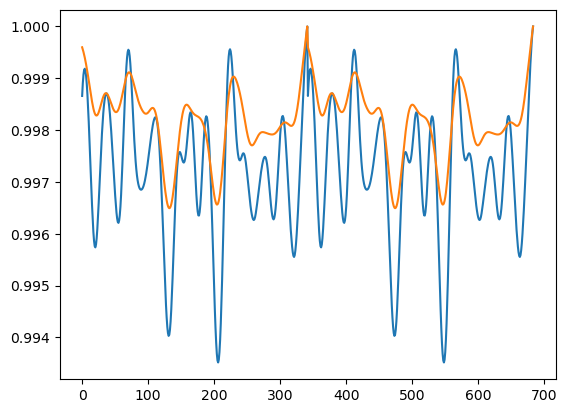

In [19]:
time_ind = 0

plt.plot(
    np.concatenate(
        (
            results.likelihood.sel(state="Continuous").isel(time=time_ind).values,
            results.likelihood.sel(state="Fragmented").isel(time=time_ind).values,
        )
    )
)
plt.plot(norm_likelihood[time_ind])

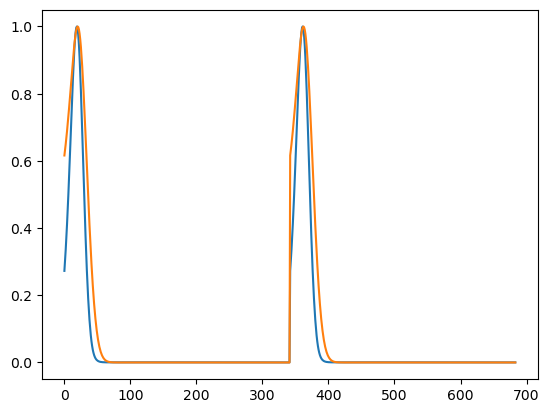

In [20]:
time_ind = 1

plt.plot(
    np.concatenate(
        (
            results.likelihood.sel(state="Continuous").isel(time=time_ind).values,
            results.likelihood.sel(state="Fragmented").isel(time=time_ind).values,
        )
    )
)
plt.plot(norm_likelihood[time_ind])

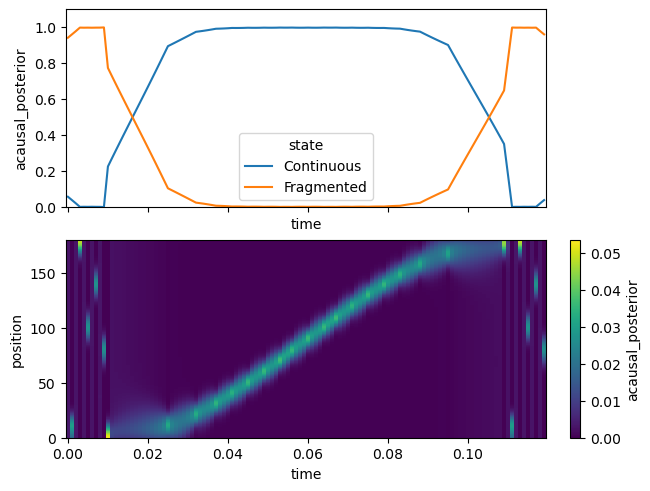

In [21]:
fig, axes = plt.subplots(2, 1, sharex=True, constrained_layout=True)
results3.acausal_posterior.unstack("state_bins").sum("position").plot(
    x="time", hue="state", ax=axes[0]
)
axes[0].set_ylim((0, 1.1))
results3.acausal_posterior.unstack("state_bins").sum("state").plot(
    x="time", y="position", ax=axes[1]
)